<a href="https://colab.research.google.com/github/cjflanagan/ScispaCy/blob/master/Explore_ScispaCy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install scispacy

     |████████████████████████████████| 10.4MB 7.5MB/s 
     |████████████████████████████████| 2.9MB 37.6MB/s 
     |████████████████████████████████| 13.0MB 40.4MB/s 
     |████████████████████████████████| 122kB 51.5MB/s 
     |████████████████████████████████| 3.7MB 37.6MB/s 
     |████████████████████████████████| 2.2MB 38.5MB/s 
     |████████████████████████████████| 5.9MB 44.9MB/s 
     |████████████████████████████████| 51kB 7.2MB/s 
     |████████████████████████████████| 153kB 47.7MB/s 
  Created wheel for scispacy: filename=scispacy-0.2.4-cp36-none-any.whl size=35204 sha256=8802db93ae9e067fa36940bc1f458199befca8388ce23d6f7a525b4a30181f1d
  Stored in directory: /root/.cache/pip/wheels/36/5e/7c/ba8d6b02f5cfa40735e40ccffd29852ca19ebca59393afd5f0
Successfully built scispacy
ERROR: boto3 1.11.15 has requirement botocore<1.15.0,>=1.14.15, but you'll have botocore 1.15.5 which is incompatible.
  Found existing installation: preshed 2.0.1
    Uninstalling preshed-2.0.1:
      Succe

In [0]:
#!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.0/en_core_sci_sm-0.2.0.tar.gz

In [0]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.0/en_core_sci_md-0.2.0.tar.gz                      #install a model for unnamed entity mentions

     |████████████████████████████████| 91.4MB 103kB/s 
  Created wheel for en-core-sci-md: filename=en_core_sci_md-0.2.0-cp36-none-any.whl size=91566690 sha256=2948d206e1071e4b0217c71a6f1390037561a48aa7fed89a6ec0e736b18a7224
  Stored in directory: /root/.cache/pip/wheels/ee/1c/61/01599990078e112136a58c0e81cd6c6f3a07d1af919f88618a
Successfully built en-core-sci-md


In [0]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.0/en_ner_bc5cdr_md-0.2.0.tar.gz                    #install an NER model trained on bc5cdr corpus

     |████████████████████████████████| 82.0MB 49kB/s 
  Created wheel for en-ner-bc5cdr-md: filename=en_ner_bc5cdr_md-0.2.0-cp36-none-any.whl size=82155212 sha256=137234c1efe06145a0111999f15ffef81a6cbbcb84d4bd73247ded3b004e3598
  Stored in directory: /root/.cache/pip/wheels/9f/7a/02/55c62741ba5a57eb10906937b3a98db3987fcf2bfccef12df6
Successfully built en-ner-bc5cdr-md


In [0]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.0/en_ner_bionlp13cg_md-0.2.0.tar.gz                #install an NER model trained on bionlp13c corpus

     |████████████████████████████████| 82.0MB 48kB/s 
  Created wheel for en-ner-bionlp13cg-md: filename=en_ner_bionlp13cg_md-0.2.0-cp36-none-any.whl size=82160568 sha256=a9986ff635d9f203b8def6c792867e38c8376955ad709989a8694cc7b40815b9
  Stored in directory: /root/.cache/pip/wheels/06/eb/5e/13cd26d4134806a8365515c6e7c107768056da5f4fd3bdd40e
Successfully built en-ner-bionlp13cg-md


In [0]:
import scispacy
import spacy
from spacy import displacy
from collections import Counter
#import en_core_web_sm
import en_ner_bc5cdr_md
#import en_core_sci_sm
import en_core_sci_md
import en_ner_bionlp13cg_md
from scispacy.abbreviation import AbbreviationDetector
from scispacy.umls_linking import UmlsEntityLinker
from collections import OrderedDict
from pprint import pprint

In [0]:
test_doc = """PURPOSE: Studies have identified several estrogen receptor alpha (ERalpha) ligand-binding domain (LBD) somatic mutations in endocrine therapy resistant, metastatic ER-positive breast cancers. The most common mutations, Tyr537Ser (Y537S) and Asp538Gly (D538G), are detected in ~ 30% of endocrine resistant metastatic breast cancer patients. These ESR1 mutations induce the agonist conformation of ERalpha, confer an estrogen-independent phenotype, and promote drug resistance to antiestrogens. METHODS: ER-positive, estrogen-dependent MCF-7 cells were engineered to express either the Y537S or D538G mutants using CRISPR knock-in (cY537S and cD538G). These cells were used to screen several estrogen receptor degrader (ERD) compounds synthesized using the Proteolysis Targeting Chimeras (PROTAC) method to induce degradation of ERalpha via the ubiquitin-proteasome pathway. RESULTS: Wild-type MCF-7 and ERalpha LBD mutant cells were treated with ERD-148 (10 pM-1 microM) and assayed for cellular proliferation using the PrestoBlue cell viability assay. ERD-148 attenuated ER-dependent growth with IC50 values of 0.8, 10.5, and 6.1 nM in MCF-7, cY537S, and cD538G cells, respectively. Western blot analysis showed that MCF-7 cells treated with 1 nM ERD-148 for 24 h exhibited reduced ERalpha protein expression as compared to the mutants. The ER-regulated gene, GREB1, demonstrated significant downregulation in parental and mutant cells after 24 h of ERD-148 treatment at 10 nM. Growth of the ER-negative, estrogen-independent MDA-MB-231 breast cancer cells was not inhibited by ERD-148 at the ~ IC90 observed in the ER-positive cells. CONCLUSION: ERD-148 inhibits the growth of ER-positive breast cancer cells via downregulating ERalpha with comparable potency to Fulvestrant with marginal non-specific toxicity"""

In [0]:
print(test_doc)

PURPOSE: Studies have identified several estrogen receptor alpha (ERalpha) ligand-binding domain (LBD) somatic mutations in endocrine therapy resistant, metastatic ER-positive breast cancers. The most common mutations, Tyr537Ser (Y537S) and Asp538Gly (D538G), are detected in ~ 30% of endocrine resistant metastatic breast cancer patients. These ESR1 mutations induce the agonist conformation of ERalpha, confer an estrogen-independent phenotype, and promote drug resistance to antiestrogens. METHODS: ER-positive, estrogen-dependent MCF-7 cells were engineered to express either the Y537S or D538G mutants using CRISPR knock-in (cY537S and cD538G). These cells were used to screen several estrogen receptor degrader (ERD) compounds synthesized using the Proteolysis Targeting Chimeras (PROTAC) method to induce degradation of ERalpha via the ubiquitin-proteasome pathway. RESULTS: Wild-type MCF-7 and ERalpha LBD mutant cells were treated with ERD-148 (10 pM-1 microM) and assayed for cellular proli

In [0]:
def display_entities(model,document):
    """ 
    This function displays word entities

    Parameters: 
         model(module): A pretrained model from spaCy(https://spacy.io/models) or ScispaCy(https://allenai.github.io/scispacy/)
         document(str): Document to be processed

    Returns: Image rendering and list of named/unnamed word entities and entity labels 
     """
    nlp = model.load()
    doc = nlp(document)
    # displacy_image = displacy.render(doc, jupyter=True,style='ent')
    entity_and_label = set([(X.text, X.label_) for X in doc.ents])
    return  entity_and_label

In [0]:
def extract_genes(doc_text):
  all_genes = []
  entity_and_label =  display_entities(en_ner_bionlp13cg_md,doc_text)
  for item in entity_and_label:
    if item[1] == 'GENE_OR_GENE_PRODUCT':
      all_genes.append(item[0].lower())
  return all_genes

def extract_disease(doc_text):
  all_disease = []
  entity_and_label =  display_entities(en_ner_bc5cdr_md,doc_text)
  for item in entity_and_label:
    if item[1] == 'DISEASE':
      disease = item[1].lower()
      all_disease.append(item[0])
  return all_disease

def gene_disease_combination(gene_list, disease_list):
  gene_disease = []
  for gene in gene_list:
    for disease in disease_list:
      gene_disease.append(gene+'<->'+disease)
  gene_disease = set(gene_disease)
  return gene_disease

def parse_document(doc_text):
  gene_list = extract_genes(doc_text)
  disease_list = extract_disease(doc_text)
  gene_disease_combined = gene_disease_combination(gene_list, disease_list)
  return gene_list, disease_list, gene_disease_combined


In [0]:
gene_list, disease_list, gene_disease_combined = parse_document(test_doc)

In [0]:
gene_disease_combined

{'cd538g<->breast cancer',
 'cd538g<->breast cancers',
 'cd538g<->toxicity',
 'eralpha<->breast cancer',
 'eralpha<->breast cancers',
 'eralpha<->toxicity',
 'esr1<->breast cancer',
 'esr1<->breast cancers',
 'esr1<->toxicity',
 'estrogen receptor alpha<->breast cancer',
 'estrogen receptor alpha<->breast cancers',
 'estrogen receptor alpha<->toxicity',
 'greb1<->breast cancer',
 'greb1<->breast cancers',
 'greb1<->toxicity',
 'knock-in<->breast cancer',
 'knock-in<->breast cancers',
 'knock-in<->toxicity',
 'protac<->breast cancer',
 'protac<->breast cancers',
 'protac<->toxicity',
 'tyr537ser (y537s)<->breast cancer',
 'tyr537ser (y537s)<->breast cancers',
 'tyr537ser (y537s)<->toxicity'}

In [0]:
gene_list

['cd538g',
 'tyr537ser (y537s)',
 'esr1',
 'estrogen receptor alpha',
 'knock-in',
 'protac',
 'eralpha',
 'greb1']

In [0]:
disease_list

['breast cancer', 'toxicity', 'breast cancers']

# Trend detection

In [0]:
import pandas as pd
from fbprophet import Prophet


In [0]:
example_data =  pd.read_csv('https://raw.githubusercontent.com/cjflanagan/ScispaCy/master/gene_disease_trend_example%20-%20Sheet1%20(1).csv')

In [62]:
example_data.head()

,month,gene_disease,num_papers
0,2007-01-01,cd538g<->breast cancer,20
1,2007-02-01,cd538g<->breast cancer,10
2,2007-03-01,cd538g<->breast cancer,8
3,2007-04-01,cd538g<->breast cancer,14
4,2007-05-01,cd538g<->breast cancer,4


In [0]:
example_data['month'] = example_data['month'].apply(str)

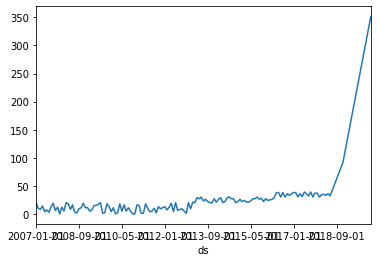

In [64]:
df = example_data.rename(columns={'month':'ds', 'num_papers':'y'})

#lets take a look at our data quickly
df.set_index('ds').y.plot()

In [65]:
model = Prophet()
model.fit(df);
future = model.make_future_dataframe(periods=366)
forecast = model.predict(future) # Future forecasts incase we want it

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


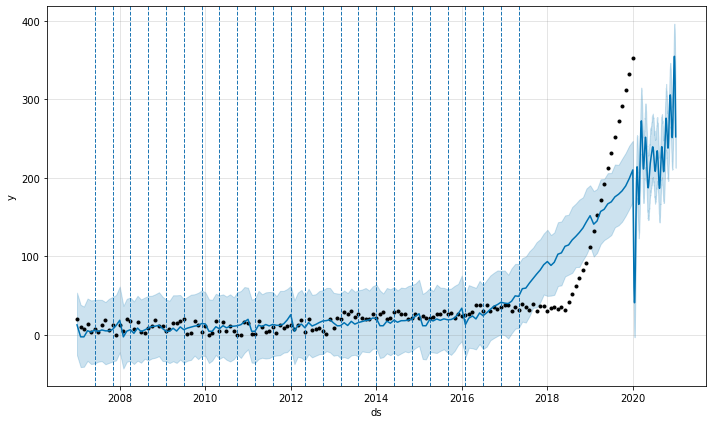

In [70]:
figure = model.plot(forecast)
for changepoint in model.changepoints:
    plt.axvline(changepoint,ls='--', lw=1)
